In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

with open('Backpropagation_from_Scratch_Assignment_Data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

<IPython.core.display.Javascript object>

(506, 6)
(506, 5) (506,)


In [2]:
with open('Backpropagation_from_Scratch_Assignment_Data.pkl', "r") as f:
    print(f)

<_io.TextIOWrapper name='Backpropagation_from_Scratch_Assignment_Data.pkl' mode='r' encoding='cp1252'>


In [3]:
print(data)

[[-1.2879095  -0.12001342 -1.45900038 -0.66660821 -0.14421743  1.85884913]
 [-0.59338101  0.36716642 -0.30309415 -0.98732948 -0.74026221  1.81901037]
 [-0.59338101 -0.26581176 -0.30309415 -0.98732948 -0.74026221  1.81989281]
 ...
 [ 0.11573841  0.79744934  1.17646583 -0.80321172  0.15812412  1.59974823]
 [ 0.11573841  0.73699637  1.17646583 -0.80321172  0.15812412  1.5997457 ]
 [ 0.11573841  0.43473151  1.17646583 -0.80321172  0.15812412  1.59957717]]


In [4]:
print(X)

[[-1.2879095  -0.12001342 -1.45900038 -0.66660821 -0.14421743]
 [-0.59338101  0.36716642 -0.30309415 -0.98732948 -0.74026221]
 [-0.59338101 -0.26581176 -0.30309415 -0.98732948 -0.74026221]
 ...
 [ 0.11573841  0.79744934  1.17646583 -0.80321172  0.15812412]
 [ 0.11573841  0.73699637  1.17646583 -0.80321172  0.15812412]
 [ 0.11573841  0.43473151  1.17646583 -0.80321172  0.15812412]]


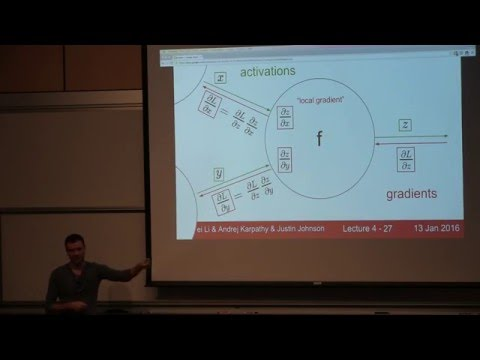

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

In [6]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

In [7]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [8]:
def forward_propagation(x, y, w):
    '''In this function, we will compute the forward propagation '''
    # X: input data point, note that in this assignment you are having 5-d data points
    # y: output varible
    # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
    # you have to return the following variables
    # exp= part1 (compute the forward propagation until exp and then store the values in exp)
    # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
    # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
    # we are computing one of the values for better understanding

    val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
    part_1 = np.exp(val_1)
    part_2 = np.tanh(part_1 + w[6])
    part_3 = sigmoid((np.sin(w[2]*x[2]) * (w[3]*x[3]+w[4]*x[4])) + w[7])
    y_pred = part_2 + part_3 * w[8]
    loss = np.power(y - y_pred, 2)
    dy_pred = -2*(y- y_pred)       


    # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
    # write code to compute the value of L=(y-y')^2 and store it in variable loss
    # compute derivative of L  w.r.to y' and store it in dy_pred 
    # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
    # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well

    forward_dict={}
    forward_dict['exp']= part_1
    forward_dict['sigmoid'] = part_3
    forward_dict['tanh'] = part_2
    forward_dict['loss'] = loss 
    forward_dict['dy_pred'] = dy_pred

    return forward_dict

w=np.ones(9)*0.1
forward_propagation(X[0],y[0],w)

{'exp': 1.1272967040973583,
 'sigmoid': 0.5279179387419721,
 'tanh': 0.8417934192562146,
 'loss': 0.9298048963072919,
 'dy_pred': -1.9285278284819143}

In [9]:
def grader_forwardprop(data):
    dl = (data['dy_pred'] == -1.9285278284819143)
    loss=(data['loss'] == 0.9298048963072919)
    part1=(data['exp'] == 1.1272967040973583)
    part2=(data['tanh'] == 0.8417934192562146)
    part3=(data['sigmoid'] == 0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

In [10]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dw1 = forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))*forward_dict["exp"]*2*((w[0]*x[0])+(w[1]*x[1]))*x[0]
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    dw2=forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))*forward_dict["exp"]*2*((w[0]*x[0])+(w[1]*x[1]))*x[1]
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    dw3 =forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*((w[3]*x[3])+(w[4]*x[4]))*math.cos(x[2]*w[2])*x[2]
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    dw4 =forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*math.sin(x[2]*w[2])*x[3]
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    dw5 =forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]*math.sin(x[2]*w[2])*x[4]
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    dw6 = forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))*forward_dict["exp"]
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    dw7 =forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    dw8 =forward_dict['dy_pred']*(forward_dict['sigmoid']*(1-forward_dict['sigmoid']))*w[8]
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dw9 =forward_dict['dy_pred']*forward_dict['sigmoid']


    backward_dict={}
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9

    return backward_dict

In [11]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

In [12]:
backward_propagation(X[0],y[0],w,forward_dict)

{'dw1': -0.22973323498702,
 'dw2': -0.02140761471775293,
 'dw3': -0.00562540558026632,
 'dw4': -0.004657941222712424,
 'dw5': -0.0010077228498574248,
 'dw6': -0.6334751873437471,
 'dw7': -0.561941842854033,
 'dw8': -0.04806288407316517,
 'dw9': -1.0181044360187037}

In [17]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    approx_gradients_list=[]
    eps=0.0001
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    for i in range(len(w)):
        w_plus =w.copy()
        w_plus[i]=w_plus[i]+eps
        Loss1=forward_propagation(x,y,w_plus)['loss']
        w_sub = w.copy()
        w_sub[i]=w_sub[i]-eps
        Loss2=forward_propagation(x,y,w_sub)['loss']
        approx =(Loss1-Loss2)/(2*eps)
        approx_gradients_list.append(approx)
#     gradient_check_value =[]
#     for i in range(len(w)):
#         num = np.linalg.norm(original_gradients_list[i] - approx_gradients_list[i])
#         den = np.linalg.norm(original_gradients_list[i]) + np.linalg.norm(approx_gradients_list[i])
#         diff = num / den
#         gradient_check_value.append(diff)
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
 
    return gradient_check_value

In [19]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value < 10**-4))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[ 7.50037812e-09 -9.01698185e-10 -2.27799430e-08 -7.36355093e-09
  3.51241761e-07  1.22687786e-09 -2.71917712e-09  5.83760634e-10
 -6.12086145e-13]


True

In [26]:
def vanilla_update(w_vanilla,X,Y,learning_rate,epochs):
    mean_loss=[]
    for e in range(epochs):
        loss_per_datapoint=0
        for i in range(len(X)):
            #calculate forward propogation
            forward_dict = forward_propagation(X[i], y[i], w_vanilla)  
            #adding loss for each datapoint
            loss_per_datapoint += forward_dict['loss']    
            #calculating gradient dict using backward propogation
            gradients = backward_propagation(X[i],y[i],w_vanilla,forward_dict)   
            #getting the values of gradients from dictionary
            dw = np.array(list(gradients.values()))                        

            
            #update w according to vanilla update => w_new = w_old - learning_rate*dw
            w_new = w_vanilla - learning_rate * dw
            w_vanilla = w_new
            
            #you have to write your code here to update weights according to vanilla optimizer
            
        # we are appending the average loss for all the datapoints
        mean_loss.append(loss_per_datapoint/len(X))
    return np.array(mean_loss)

True


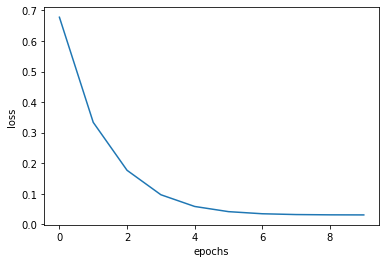

In [27]:
def grader_grad_check(array):
    assert(np.round(array[0],3)==0.678 and np.round(array[-1],3)==0.0310)
    return True 

w_vanilla=np.array([ 0.00244274 ,0.00973789,-0.00504212, 0.00146322,-0.00952112, 0.03329146,
 -0.00042503  ,0.00149911 ,0.0136601 ])
learning_rate=0.001
epochs=10
vanilla_loss_array= vanilla_update(w_vanilla,X,y,learning_rate,epochs)
print(grader_grad_check(vanilla_loss_array))
plt.plot(np.arange(epochs),vanilla_loss_array)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
vanilla_update(w_vanilla,X,y,learning_rate,epochs)

In [33]:
def momentum_update(w_momentum,X,Y,learning_rate,epochs,v,gamma):
    mean_loss=[]
    for e in range(epochs):
        loss_per_datapoint=0
        for i in range(len(X)):
            #calculate forward propogation
            forward_dict = forward_propagation(X[i], y[i], w_momentum)  
            #adding loss for each datapoint
            loss_per_datapoint+=forward_dict['loss']    
            #calculating gradient dict using backward propogation
            gradients = backward_propagation(X[i],y[i],w_momentum,forward_dict)   
            #getting the values of gradients from dictionary
            dw = np.array(list(gradients.values()))                        

            #you have to write your code here to update weights according to momentum optimizer
            v = gamma * v + (learning_rate * dw)
            w_momentum = w_momentum - v 

            
        # we are appending the average loss for all the datapoints
        mean_loss.append(loss_per_datapoint/len(X))
    return np.array(mean_loss)

True


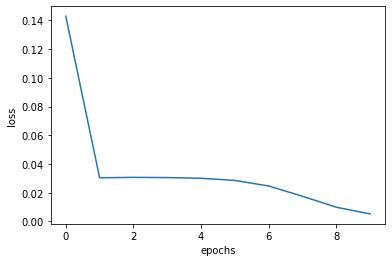

In [34]:
def grader_grad_check(array):
    assert(np.round(array[0],3)==0.143 and np.round(array[-1],3)==0.005)
    return True 

w_momentum=np.array([ 0.00244274 ,0.00973789,-0.00504212, 0.00146322,-0.00952112, 0.03329146,
 -0.00042503  ,0.00149911 ,0.0136601 ])

learning_rate=0.001
epochs=10
v=np.zeros(9)                         
m=0.9
momentum_loss_array= momentum_update(w_momentum,X,y,learning_rate,epochs,v,m)
print(grader_grad_check(momentum_loss_array))
plt.plot(np.arange(epochs),momentum_loss_array)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

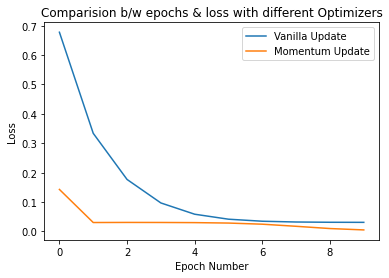

In [35]:

plt.plot(vanilla_loss_array, label = 'Vanilla Update')
plt.plot(momentum_loss_array, label = 'Momentum Update')


plt.title('Comparision b/w epochs & loss with different Optimizers')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()